In [ ]:
# Import necessary Dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime, calendar

In [ ]:
# download the names.txt file from github
!wget https://raw.githubusercontent.com/sreebasavamanju/Financial-Analysis/main/data/NIFTY_Index_with_Change_percent.json

--2024-06-07 05:27:43--  https://raw.githubusercontent.com/sreebasavamanju/Financial-Analysis/main/data/NIFTY_Index_with_Change_percent.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2319680 (2.2M) [text/plain]
Saving to: ‘NIFTY_Index_with_Change_percent.json’

NIFTY_Index_with_Ch 100%[===================>]   2.21M  --.-KB/s    in 0.01s   

2024-06-07 05:27:43 (178 MB/s) - ‘NIFTY_Index_with_Change_percent.json’ saved [2319680/2319680]



In [ ]:
# Function to last thursday date of month
def LastThInMonth(year, month):
    # Create a datetime.date for the last day of the given month
    daysInMonth = calendar.monthrange(year, month)[1]   # Returns (month, numberOfDaysInMonth)
    dt = datetime.date(year, month, daysInMonth)

    # Back up to the most recent Thursday
    offset = 4 - dt.isoweekday()
    if offset > 0: offset -= 7                          # Back up one week if necessary
    dt += datetime.timedelta(offset)                    # dt is now date of last Th in month

    # Throw an exception if dt is in the current month and occurred before today
    now = datetime.date.today()                         # Get current date (local time, not utc)
    if dt.year == now.year and dt.month == now.month and dt < now:
        raise Exception('Oops - missed the last Thursday of this month')

    return dt

def getListOfDates(startYear,endYear):

    dates = []
    for year in range(startYear,endYear):
        for month in range(1, 13):
            dates.append(LastThInMonth(year, month))
    return dates

In [ ]:
# Read Json from file
data = []
with open('NIFTY_Index_with_Change_percent.json', 'r') as f:
  for line in f:
    data.append(json.loads(line))

In [ ]:
df = pd.DataFrame(data)
df['last_closeRaw'] = df['last_closeRaw'].astype('float64')
df = df.round(2)
# Convert to dateTime
df['datetime'] = pd.to_datetime(df['rowDate'])
df = df.sort_values(by='datetime')
df['day'] = df['datetime'].dt.day # get day from datetime
print(df.dtypes)
print(df)

color                        object
rowDate                      object
rowDateRaw                    int64
last_close                   object
last_open                    object
last_max                     object
last_min                     object
volume                       object
volumeRaw                     int64
change_percent               object
last_closeRaw               float64
last_openRaw                 object
last_maxRaw                  object
last_minRaw                  object
change_percentRaw           float64
tags                         object
datetime             datetime64[ns]
day                           int32
dtype: object
       color       rowDate  rowDateRaw last_close  last_open   last_max  \
4999  u-down  Jan 01, 2002  1009843200   1,055.30   1,058.85   1,071.15   
4998    u-up  Jan 02, 2002  1009929600   1,060.75   1,054.95   1,065.25   
4997    u-up  Jan 03, 2002  1010016000   1,072.25   1,063.45   1,074.85   
4996    u-up  Jan 04, 2002  1010102400

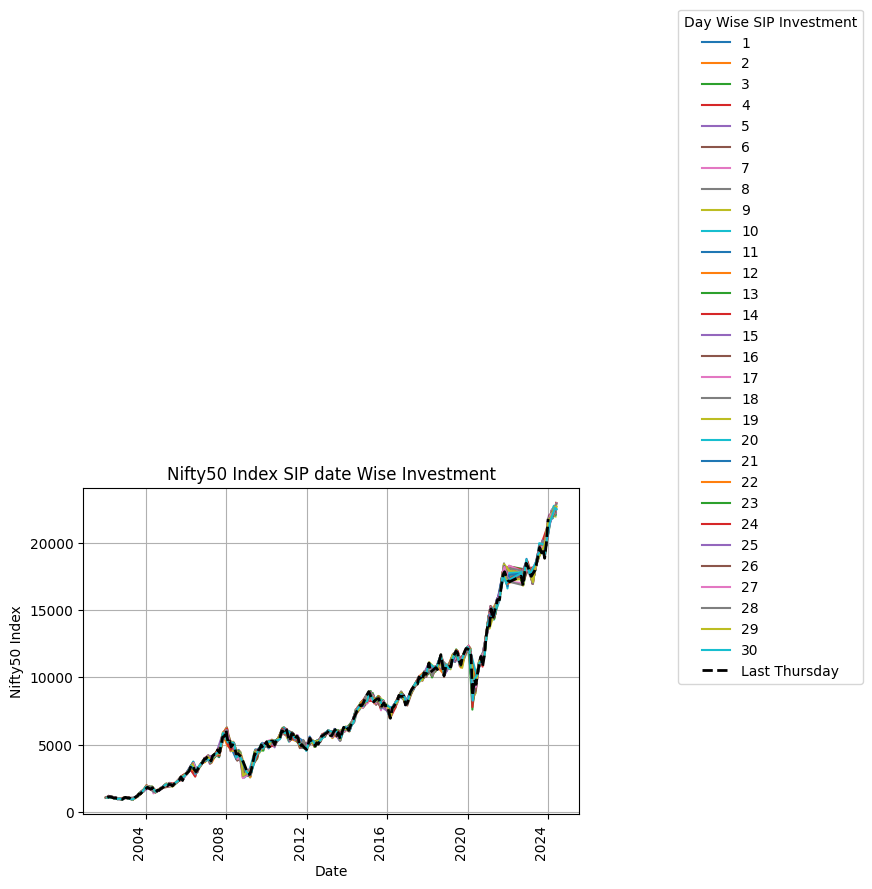

In [ ]:
# plot
fig, ax = plt.subplots()
for i in range(1, 31):
  local_df = df.loc[df['day'] == i]
  local_df.plot(ax=ax, kind='line', x='datetime', y='last_closeRaw', label=i)

dates = getListOfDates(startYear=2001, endYear=2024)

local_df = df.loc[df['datetime'].isin(dates)]
# print(len(local_df))
local_df.plot(ax=ax, kind='line', linestyle='dashed', x='datetime', y='last_closeRaw', label='Last Thursday',
                linewidth=2, color='black')

plt.legend(loc="upper left", ncol=13)
plt.xticks(rotation=90)
plt.title("Nifty50 Index SIP date Wise Investment")
plt.xlabel("Date")
plt.ylabel("Nifty50 Index")
plt.legend( loc=(1.2,0.4),
                       title = "Day Wise SIP Investment")
plt.grid()
plt.show()